**Ethan Ding SID: 3033043613**

**Introduction**
This project seeks to explore the linear coefficients that best fit the relationship between the various features of wine, and the quality score it is given by experts. The features we'll be exploring will be from the following list:

- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol concentration

The report is broken into 5 sections:
1. Clening the data and describig it through scatterplots
2. An analysis of the results using Ordinary Least Squares
3. An analysis of the results using Ridge Regression (L2 Normalization)
4. An analysis of the results using LASSO Regression (L1 Normalization)
5. An analysis of the results using Elastic Net (L1 + L2 Normalization)
6. Presentation of findings in a table format.

**Data Cleaning and Scatterplot**
For some basic clarity, we'll illustrate some scatterplots of the various features of the wine with the quality

Some things to note

- since the quality is effectively a categorical ordinal data, the values for qualiy are jittered in the scatterplots to give a better illustration of density (otherwise they would be on top of each other)
- there seems to be a slight positive correlation between quality and the following features, which would let us expect their coefficients to be positive 
    - fixed acidity
    - citric acid
    - sulphates
    - alcohol content
- a slight negative correlation between quality and the following features, which would let us expect their coefficients to be negative
    - volatile acidity
    - chlorides 
    - total sulphur dioxide
    - density
    - pH 
- no meaningful correlation between quality and the following, which would let us expect thier coefficients to be close to zero 
    - residual sugar
    - free sulphur dioxide

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
headers = ["fixed acidity", "volatile acidity", "citric acid", 
           "residual sugar", "chlorides", "free sulfur dioxide", 
           "total sulfur dioxide", "density", "pH",
           "sulphates","alcohol","quality"]
wine = pd.read_csv('wine-quality-red.csv', header = None, skiprows = 1, sep = ';', names = headers)
#wine = (wine-wine.min())/(wine.max()-wine.min())
# this last line normalizes the data onto a [0,1] mode, but 
#display((wine.max(), wine.min()),
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


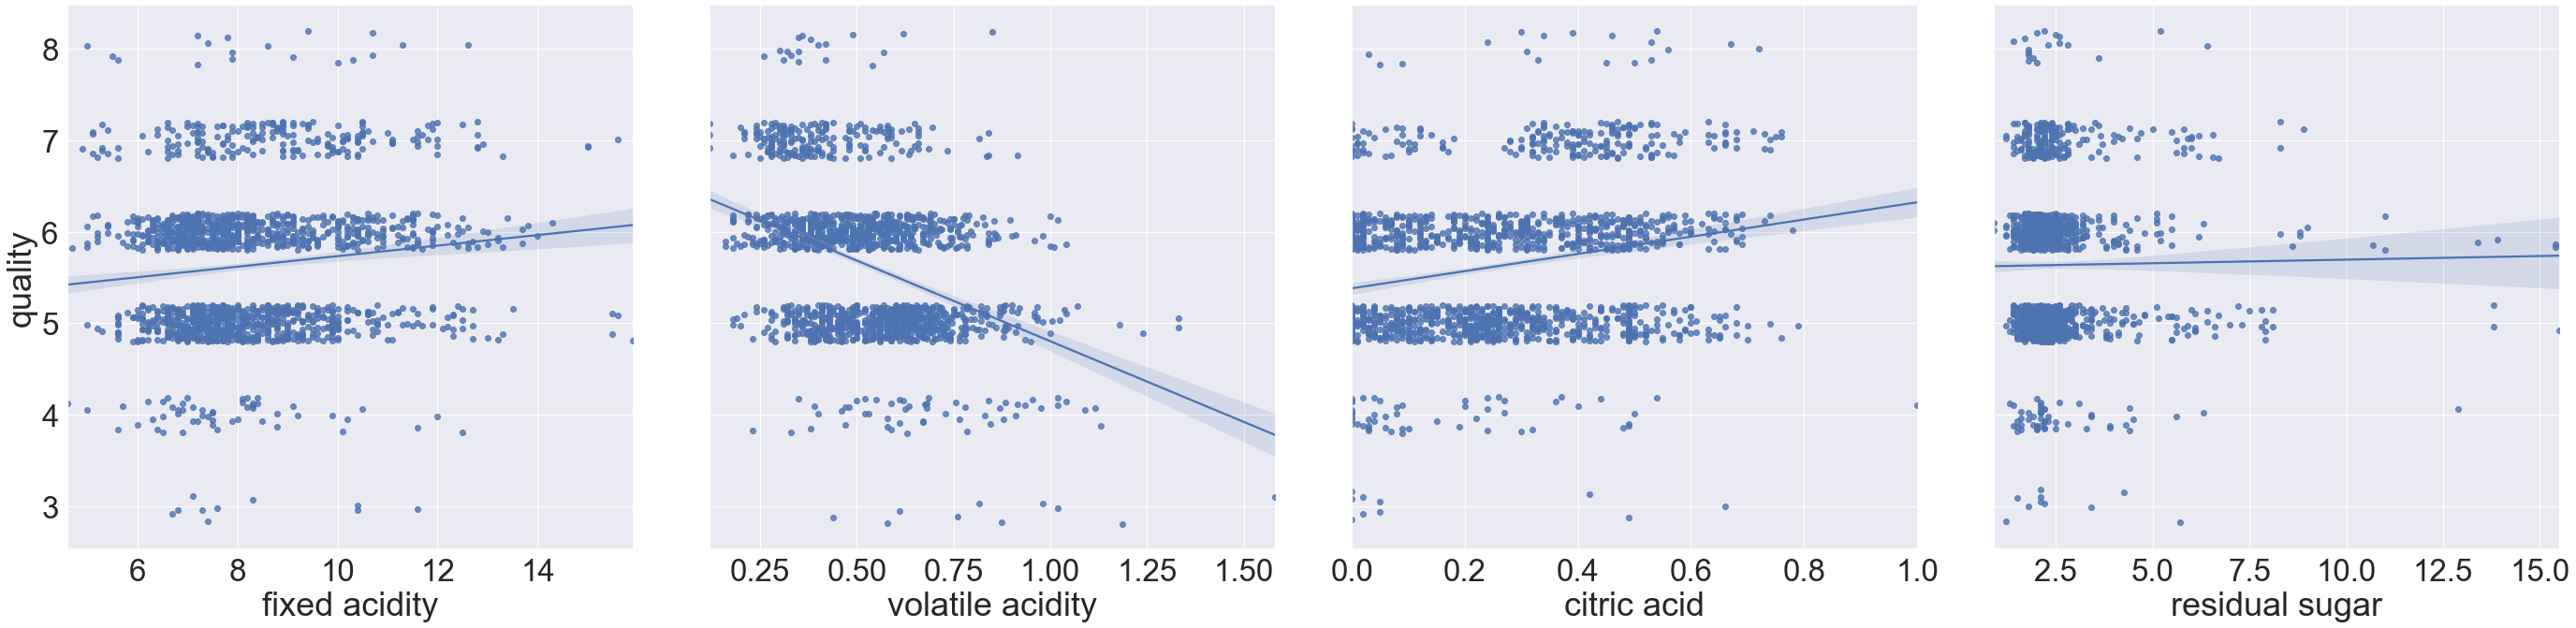

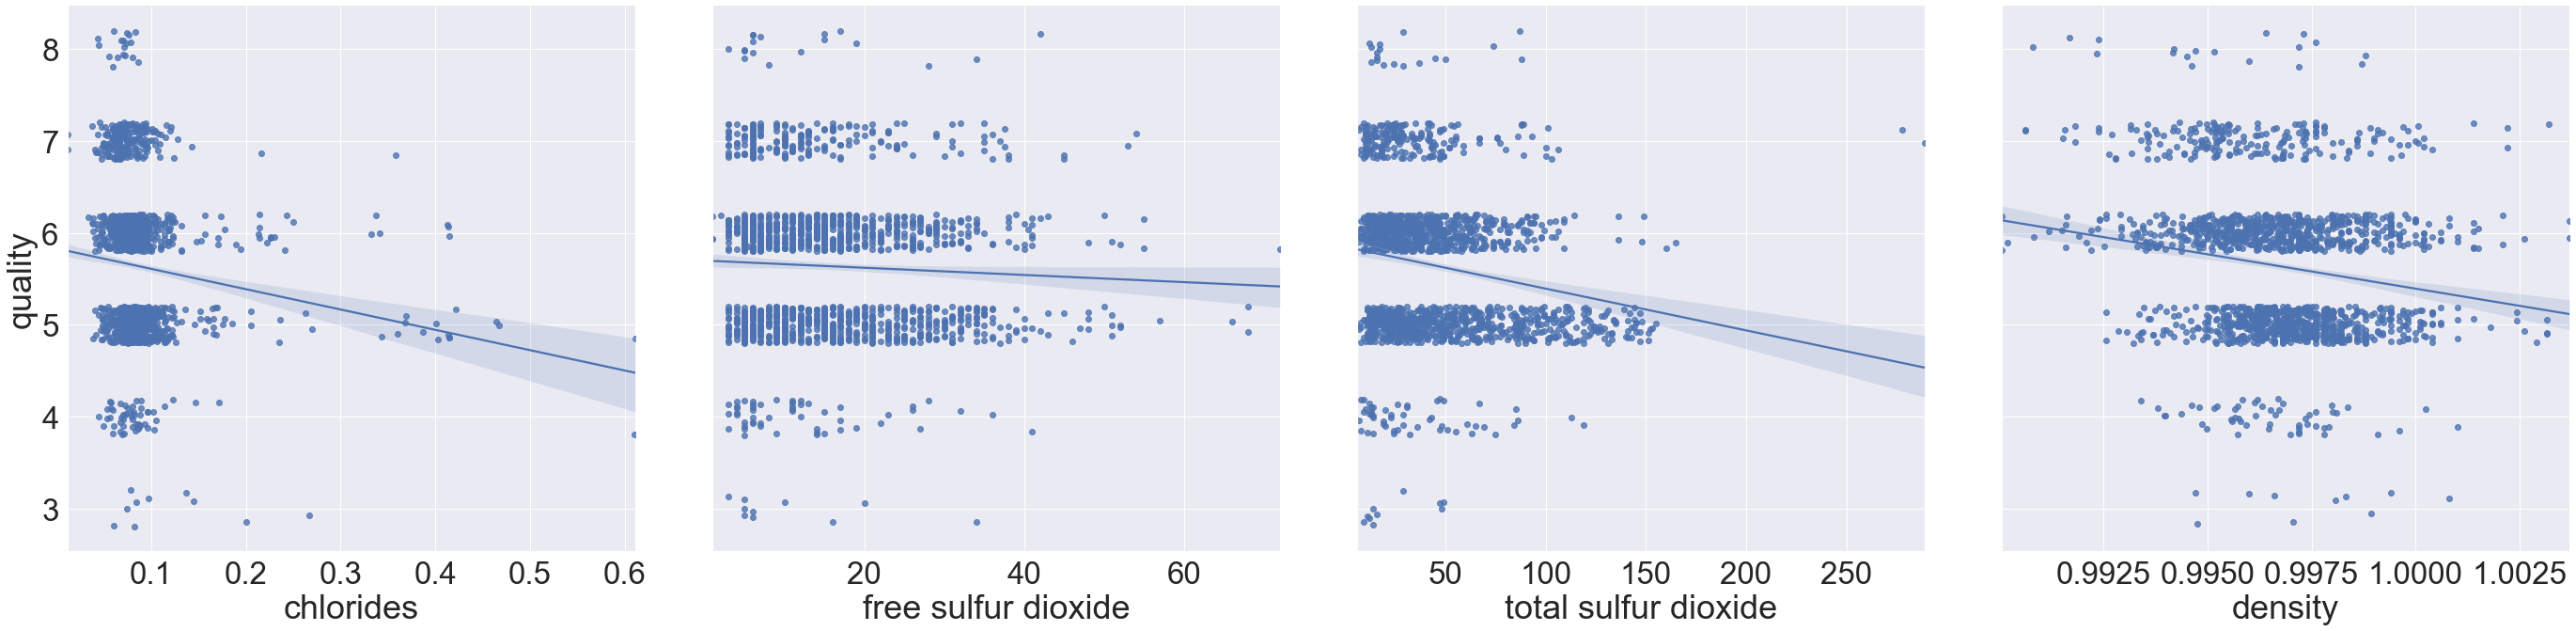

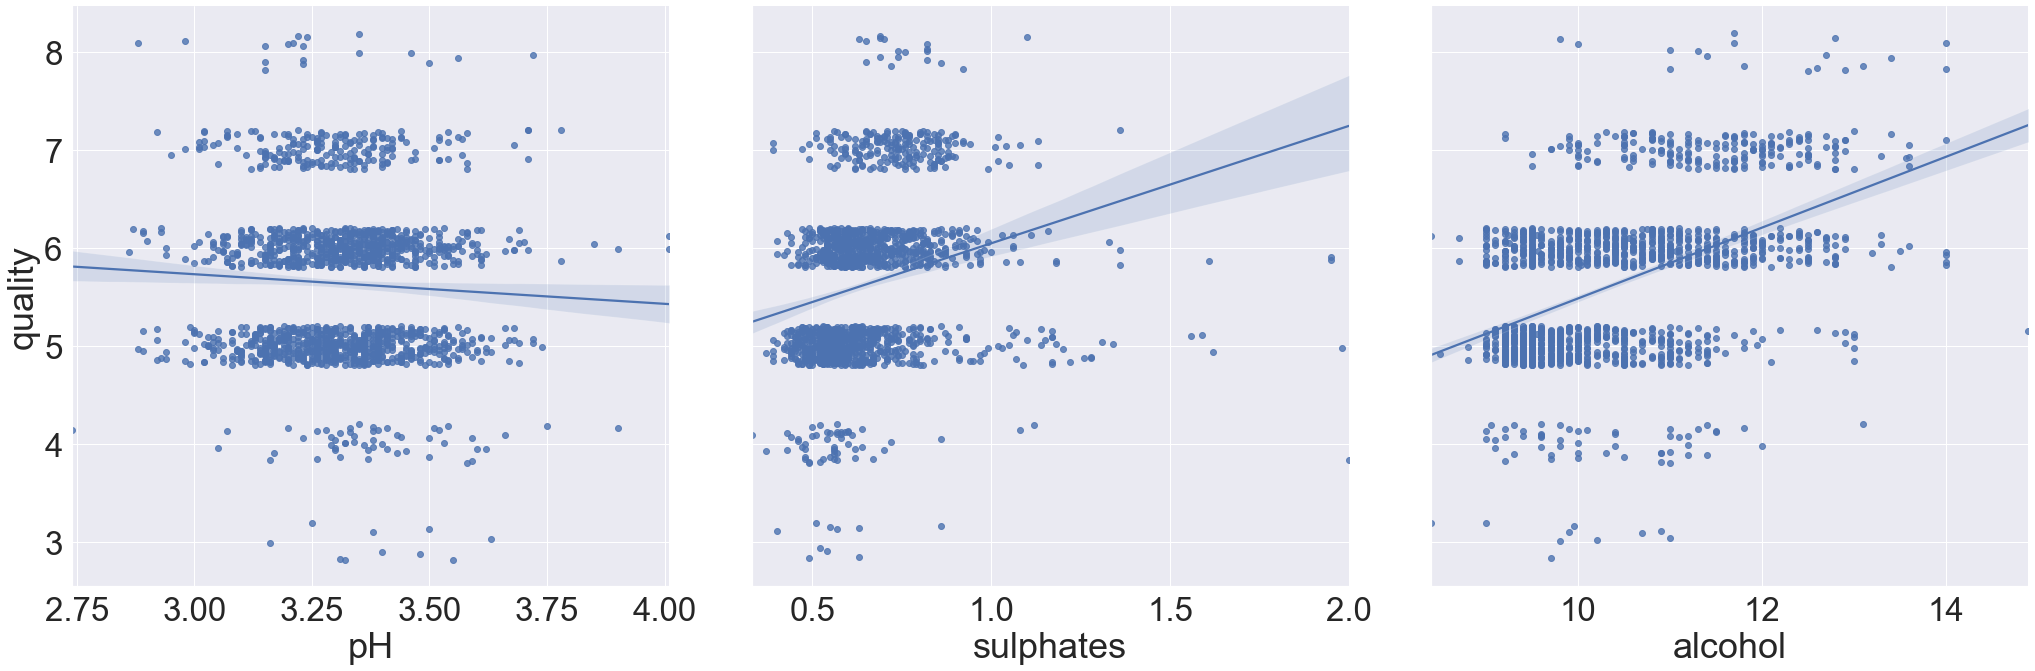

In [3]:
sns.set(font_scale=3)
a = sns.PairGrid(wine, y_vars=["quality"], 
                 x_vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar"], 
                 height=10)
b = sns.PairGrid(wine, y_vars=["quality"], 
                 x_vars=["chlorides", "free sulfur dioxide", "total sulfur dioxide", "density"], 
                 height=10)
c = sns.PairGrid(wine, y_vars=["quality"], 
                 x_vars=["pH", "sulphates","alcohol"], 
                 height=10) 
a.map(sns.regplot, y_jitter=0.2) #using a regplot bc scatterplot y_jiggle is broken 
b.map(sns.regplot, y_jitter=0.2) 
c.map(sns.regplot, y_jitter=0.2) 

**Test / Training Split**
To begin, we will start by splitting our data into training and test samples. To do this we'll be using the train_test_split method from the sklearn.model_selection library. We will use the random seed 47 to be able to regenerate this data at a later date if we need to verify our results

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(47)

X = wine.drop(['quality'], axis=1)
Y = pd.Series(wine['quality'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

**Root Mean Squared Error** In order to assess how much error a prediction has compared to its actual results, we'll define a simple function called RMSE which assess the accuracy of a predicted set of wine qualities against the true set of wine qualities. This function takes two arrays, one of predicted and one of actual values as inputs.

In [5]:
def rmse(actual_y, predicted_y):
    return np.sqrt( sum((actual_y - predicted_y)**2) / len(predicted_y) )

**Ordinary Least Squares (OLS) Regression**

In the following section, we use Ordinary Least Squares regression to find coefficient matrices that can be used to predict the wine quality. To do this, we use the sklearn.linear_model.LinearRegression() method (documentation on https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), which the site describes as: 

*Ordinary least squares Linear Regression. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.*

There are no tuning parameters related to Ordinary Least Squares, so cross-validation is not necessary in this case:

In [6]:
from sklearn.linear_model import LinearRegression

OLS_model = LinearRegression(normalize=True)
OLS_model.fit(X = X_train, y = Y_train)
display(OLS_model.coef_, 
        OLS_model.intercept_) #intercept is the constant

array([ 2.38691870e-02, -1.04951484e+00, -1.68018124e-01,  1.48270614e-02,
       -1.61581005e+00,  5.20196398e-03, -3.27828674e-03, -1.10834974e+01,
       -4.08774853e-01,  9.44402334e-01,  3.04678999e-01])

14.82619019208942

To illustrate the accuracy of this linear regression model, we'll assess both the RMSE of the created training model's ability to predict the qualiy of wine on the original training set and test set. Obviously, training error is lower than test error, but in general both values are well within a range of 1 and are fairly decent predcitions. 

The graph below shows the absolute difference in predicted quality vs actual quality for the test data set, as a function of citric acid, Citric acid was chosen becasue it has a fairly even distribution and would be easier to observe. Generally, it seems like there are quite a few points dramatically underpredicting, and far fewer points dramatically overpredicting.

OLS Training Error:  0.6344050984347452
OLS Test Error: 0.7452052680314951


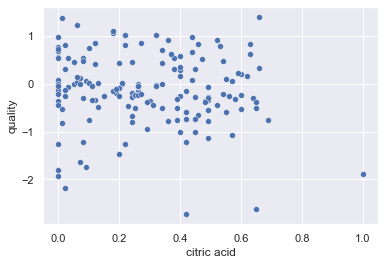

In [7]:
OLS_train_prediction = OLS_model.predict(X_train)
OLS_test_prediction = OLS_model.predict(X_test)

OLS_train_rmse = rmse(Y_train, OLS_train_prediction)
OLS_test_rmse = rmse(Y_test, OLS_test_prediction)

OLS_accuracy = Y_test - OLS_test_prediction
sns.set(font_scale=1, )
sns.scatterplot(x=X_test['citric acid'], y=OLS_accuracy); #chose to use citric acid as the x 
                                                    #axis since it showed the most even distribution of points 

print('OLS Training Error: ', OLS_train_rmse)
print('OLS Test Error:', OLS_test_rmse)

**Ridge Regression**

In the following section, we use ridge regression to create a linear model that prediccts wine quality using the features of wine. We'll be using the Ridge method from the sklearn.linear_model library, documentation for which can be found at:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge 

Additionaly, we'll be using the KFold method from the sklearn.model_selection library to assess cross-validation error. The documentation for KFold can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

For this function, the $\mu$ tuning parameter is referred to as alpha in the Ridge regression function. To find the optimal tuning paramter value, we'll first define a function that computes cross validation error called compute_cv_error (imported from the UC Berkeley Data 100 curriculum). This method is return the average cross-validatin error of a given model on a specific X_train and Y_train data set. 

In [8]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx] 
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(X = split_X_train, y = split_Y_train)
        Y_prediction = model.predict(split_X_valid)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, Y_prediction)

        validation_errors.append(error)
        
    return np.mean(validation_errors)

We'll run this method iteratively over multiple ridge regression models with different tuning paramter $\mu$ until we get the one with lowest cross validation error.

In [9]:
from sklearn.linear_model import Ridge

errors = []
for i in np.linspace(0,0.06,26):
    model = Ridge(alpha = i, normalize=True)
    
    # compute the cross validation error
    error = compute_CV_error(model, X_train, Y_train)
    i = i.round(3)
    print(f"Alpha value: {i} \t Cross Validation Error: {error}")
    errors.append(error)

best_err = min(errors)

print(f'\nBEST ERROR VALUE IS {best_err}')

Alpha value: 0.0 	 Cross Validation Error: 0.6404235314757651
Alpha value: 0.002 	 Cross Validation Error: 0.6403676116415921
Alpha value: 0.005 	 Cross Validation Error: 0.6403176514317692
Alpha value: 0.007 	 Cross Validation Error: 0.6402730412585299
Alpha value: 0.01 	 Cross Validation Error: 0.6402332709303056
Alpha value: 0.012 	 Cross Validation Error: 0.6401979094712142
Alpha value: 0.014 	 Cross Validation Error: 0.6401665896448319
Alpha value: 0.017 	 Cross Validation Error: 0.6401389959641256
Alpha value: 0.019 	 Cross Validation Error: 0.6401148553134337
Alpha value: 0.022 	 Cross Validation Error: 0.640093929547736
Alpha value: 0.024 	 Cross Validation Error: 0.6400760096031336
Alpha value: 0.026 	 Cross Validation Error: 0.6400609107727568
Alpha value: 0.029 	 Cross Validation Error: 0.6400484688890753
Alpha value: 0.031 	 Cross Validation Error: 0.6400385372167834
Alpha value: 0.034 	 Cross Validation Error: 0.640030983906964
Alpha value: 0.036 	 Cross Validation Error: 

Text(0.5, 1.0, 'Graph of tuning paramter value against cross validation error for Ridge Regression')

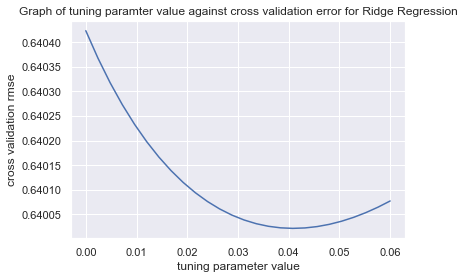

In [10]:
ridge = sns.lineplot(x=np.linspace(0,0.06,26), y=errors)
ridge.set_xlabel('tuning parameter value')
ridge.set_ylabel('cross validation rmse')
ridge.set_title('Graph of tuning paramter value against cross validation error for Ridge Regression')

From the above graph and computed results, we see that the tuning parameter that produces the lowest cross validation error is at 0.041. Well use 0.041 as our tuning paramter for our overall ridge regression model for the entire dataset, and find the optiaml table of coefficients for our model for ridge regression and a tuning paramter of 0.041. 

In [11]:
Ridge_model = Ridge(alpha = 0.041, normalize=True)
Ridge_model.fit(X = X_train, y = Y_train)
display(Ridge_model.coef_, 
        Ridge_model.intercept_) #intercept is the constant

array([ 3.14266009e-02, -9.96344821e-01, -8.84210705e-02,  1.84913959e-02,
       -1.58541597e+00,  4.52869527e-03, -3.10096729e-03, -2.26597901e+01,
       -3.06091137e-01,  9.27324408e-01,  2.81858005e-01])

26.151822481494058

Ridge Training Error:  0.6347186608086558
Ridge Test Error: 0.7412040417792838


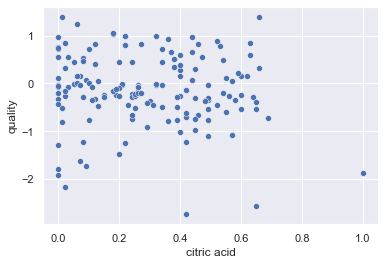

In [12]:
Ridge_train_prediction = Ridge_model.predict(X_train)
Ridge_test_prediction = Ridge_model.predict(X_test)

Ridge_train_rmse = rmse(Y_train, Ridge_train_prediction)
Ridge_test_rmse = rmse(Y_test, Ridge_test_prediction)

Ridge_accuracy = Y_test - Ridge_test_prediction
sns.set(font_scale=1)
sns.scatterplot(x=X_test['citric acid'], y=Ridge_accuracy); #chose to use citric acid as the x 
                                                    #axis since it showed the most even distribution of points 

print('Ridge Training Error: ', Ridge_train_rmse)
print('Ridge Test Error:', Ridge_test_rmse)

**LASSO Regression**

In the following section, we use lasso regression to create a linear model that predicts wine quality using the features of wine. We'll be using the Lasso method from the sklearn.linear_model library, documentation for which can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso 

Everything else in this section will be identical to the methodology used in the Ridge Regression section. We'll use the same compute_cv_error method, and almost identical for loop to calculate best Lasso regression parameter $\mu$.

Sincere there is no need to redefine compute_cv_error, we'll run the for loop and generate the graph of error against data right away. 

*EDIT: The method also advised us against using Lasso regression, as it threw many errors indicating that the function doesn't converge properly. Never the less, to avoid cluttering the page with errors, I imported a library to ignore the errors so that we can illustrate what the effect of implementing LASSO regression was.*

In [13]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso

lasso_errors = []
for i in np.linspace(0,0.0005,26):
    model = Lasso(alpha = i, normalize=True)
    
    # compute the cross validation error
    error = compute_CV_error(model, X_train, Y_train)
    i = i.round(7)
    print(f"Alpha value: {i} \t Cross Validation Error: {error}")
    lasso_errors.append(error)

best_err = min(lasso_errors)

print(f'\nBEST ERROR VALUE IS {best_err}')

Alpha value: 0.0 	 Cross Validation Error: 0.640423531475765
Alpha value: 2e-05 	 Cross Validation Error: 0.6403405670438754
Alpha value: 4e-05 	 Cross Validation Error: 0.6403113025218532
Alpha value: 6e-05 	 Cross Validation Error: 0.6402874561474643
Alpha value: 8e-05 	 Cross Validation Error: 0.6402419144817226
Alpha value: 0.0001 	 Cross Validation Error: 0.6401808124198475
Alpha value: 0.00012 	 Cross Validation Error: 0.6401372610218109
Alpha value: 0.00014 	 Cross Validation Error: 0.6401095761606023
Alpha value: 0.00016 	 Cross Validation Error: 0.6400943762559468
Alpha value: 0.00018 	 Cross Validation Error: 0.640086224566415
Alpha value: 0.0002 	 Cross Validation Error: 0.6400997934492825
Alpha value: 0.00022 	 Cross Validation Error: 0.6401150596989582
Alpha value: 0.00024 	 Cross Validation Error: 0.6401417029875566
Alpha value: 0.00026 	 Cross Validation Error: 0.6401795218805453
Alpha value: 0.00028 	 Cross Validation Error: 0.6402278379529085
Alpha value: 0.0003 	 Cros

Text(0.5, 1.0, 'Graph of tuning paramter value against cross validation error for Lasso Regression')

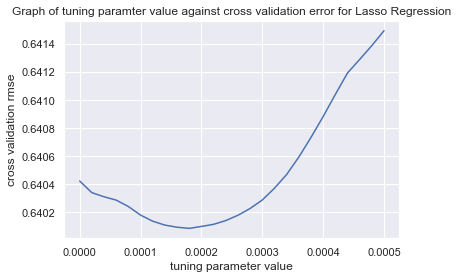

In [14]:
lasso = sns.lineplot(x=np.linspace(0,0.0005,26), y=lasso_errors, )
lasso.set_xlabel('tuning parameter value')
lasso.set_ylabel('cross validation rmse')
lasso.set_title('Graph of tuning paramter value against cross validation error for Lasso Regression')

From the above graph and computed results, we see that the tuning parameter that produces the lowest cross validation error for Lasso regression is 0.00018. 

We will execute the same code used to generate the coefficients of the Lasso regression with tuning parameter 0.00018. We notice that the coefficients for citric acid and density have been pushed to zero.

In [15]:
Lasso_model = Lasso(alpha = 0.00018, normalize=True)
Lasso_model.fit(X = X_train, y = Y_train)
display(Lasso_model.coef_,
        Lasso_model.intercept_) #note that these values are idnetical to the 
                                #values produced by the OLS prediction model
print("Number of feature used:{}".format(np.sum(Lasso_model.coef_ != 0)))
print("Number of feature unused:{}".format(np.sum(Lasso_model.coef_ == 0)))


array([ 0.00418636, -0.98961588, -0.        ,  0.00435781, -1.49653343,
        0.00364269, -0.00282405, -0.        , -0.37537327,  0.87170008,
        0.30809713])

3.786834392064147

Number of feature used:9
Number of feature unused:2


LASSO Training Error:  0.6351835876893493
LASSO Test Error: 0.7446134294028066


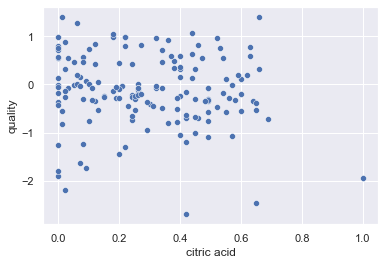

In [16]:
Lasso_train_prediction = Lasso_model.predict(X_train)
Lasso_test_prediction = Lasso_model.predict(X_test)

Lasso_train_rmse = rmse(Y_train, Lasso_train_prediction)
Lasso_test_rmse = rmse(Y_test, Lasso_test_prediction)

Lasso_accuracy = Y_test - Lasso_test_prediction
sns.set(font_scale=1)
sns.scatterplot(x=X_test['citric acid'], y=Lasso_accuracy); #chose to use citric acid as the x 
                                                    #axis since it showed the most even distribution of points 

print('LASSO Training Error: ', Lasso_train_rmse)
print('LASSO Test Error:', Lasso_test_rmse)

In [17]:
print('LASSO Training Error: ', Lasso_train_rmse)
print('LASSO Test Error:', Lasso_test_rmse)
print('Ridge Training Error: ', Ridge_train_rmse)
print('Ridge Test Error:', Ridge_test_rmse)

LASSO Training Error:  0.6351835876893493
LASSO Test Error: 0.7446134294028066
Ridge Training Error:  0.6347186608086558
Ridge Test Error: 0.7412040417792838


**Elastic Net Regression**

In the following section, we use elastic net regression to create a linear model that predicts wine quality using the features of wine. We'll be using the ElasticNet method from the sklearn.linear_model library found on https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet. 

We will be using the same compute_cv_error function, but our for loop will instead have two sections, to adjust the two different tuning parameters of an Elastic Net regression: $alpha$ is the value of L1 + L2 ratio multipliers added togehter, while $l1-ratio$ is the percentage of that ratio which is comprised of L1. 

For example, an ElasticNet Model with $alpha = 2$, and $li-ratio = 0.75$ is the same as having an L1 coefficient of 1.5 and L2 coefficient of 0.5. 

Sincere there is no need to redefine compute_cv_error, we'll jump right into the altered for loop for ElasticNet regression:

In [18]:
from sklearn.linear_model import ElasticNet

elastic_errors = []
for i in np.linspace(0.00003,0.00004,5):
    for j in np.linspace(0.000000000005,0.00000000002,5):
        model = ElasticNet(alpha = i, l1_ratio=j, normalize=True)

        # compute the cross validation error
        error = compute_CV_error(model, X_train, Y_train)
        i = i.round(7)
        j = j.round(14)
        print(f"Alpha value: {i} \t L1_Ratio: {j} \t \t Cross Validation Error: {error}")
        elastic_errors.append(error)

best_err = min(elastic_errors)

print(f'\nBEST ERROR VALUE IS {best_err}')

Alpha value: 3e-05 	 L1_Ratio: 5e-12 	 	 Cross Validation Error: 0.6400287252529584
Alpha value: 3e-05 	 L1_Ratio: 8.75e-12 	 	 Cross Validation Error: 0.640028725252959
Alpha value: 3e-05 	 L1_Ratio: 1.25e-11 	 	 Cross Validation Error: 0.6400287252529593
Alpha value: 3e-05 	 L1_Ratio: 1.625e-11 	 	 Cross Validation Error: 0.64002872525296
Alpha value: 3e-05 	 L1_Ratio: 2e-11 	 	 Cross Validation Error: 0.6400287252529605
Alpha value: 3.25e-05 	 L1_Ratio: 5e-12 	 	 Cross Validation Error: 0.6400236645544307
Alpha value: 3.25e-05 	 L1_Ratio: 8.75e-12 	 	 Cross Validation Error: 0.6400236645544308
Alpha value: 3.25e-05 	 L1_Ratio: 1.25e-11 	 	 Cross Validation Error: 0.640023664554431
Alpha value: 3.25e-05 	 L1_Ratio: 1.625e-11 	 	 Cross Validation Error: 0.640023664554431
Alpha value: 3.25e-05 	 L1_Ratio: 2e-11 	 	 Cross Validation Error: 0.6400236645544315
Alpha value: 3.5e-05 	 L1_Ratio: 5e-12 	 	 Cross Validation Error: 0.6400216129437519
Alpha value: 3.5e-05 	 L1_Ratio: 8.75e-12 	 

The best cross-validated error value occurs at the row: 
Alpha value: 3.5e-05 	 Li_Ratio: 1.25e-11 	 	 Cross Validation Error: 0.6400216129437518

with an alpha value of $3.5*10^{-5}$ and an L1 ratio of $1.25*10^{-11}$, creating a cross validation error of 0.6400216129437518. It should be noted that at this order of magnitude, it's very difficult to conclusively say that this difference in cross validation error is significantly meaningful, especially when compared to the limitations of the system. 

Below is a 3d rendering of the cross validation error against the 2 tuning parameters of alpha value and L1-ratio:

Text(0.5, 0.92, 'Graph of two tuning parameters against RMSE for ')

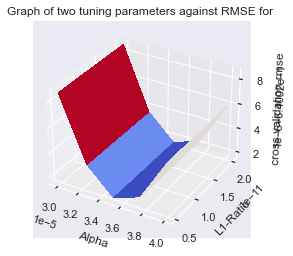

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
mat_size = 5
elastic = fig.gca(projection='3d')
X = np.linspace(0.00003,0.00004,mat_size)
Y = np.linspace(0.000000000005,0.00000000002,mat_size)
X, Y = np.meshgrid(X, Y)
Z = np.empty(shape=[mat_size, mat_size])
for i in range(mat_size):
    for j in range(mat_size):
        Z[i][j] = elastic_errors[(j*mat_size) + i]; 
surf = elastic.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
elastic.set_xlabel('Alpha')
elastic.set_ylabel('L1-Ratio')
elastic.set_zlabel('cross validation rmse')
elastic.set_title('Graph of two tuning parameters against RMSE for ')

In [20]:
Elastic_model = ElasticNet(alpha = 0.000035, l1_ratio=0.0000000000125,  normalize=True)
Elastic_model.fit(X = X_train, y = Y_train)
display(Elastic_model.coef_, 
        Elastic_model.intercept_) #intercept is the constant

array([ 3.19881132e-02, -9.86127645e-01, -7.28542201e-02,  1.88374776e-02,
       -1.57886811e+00,  4.39974418e-03, -3.06673754e-03, -2.41004609e+01,
       -2.91481938e-01,  9.21893455e-01,  2.78049541e-01])

27.567410129802724

Elastic Net Training Error:  0.6348507491654413
Elastic Net Test Error: 0.7404494774555818


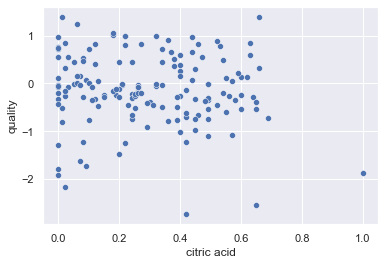

In [21]:
Elastic_train_prediction = Elastic_model.predict(X_train)
Elastic_test_prediction = Elastic_model.predict(X_test)

Elastic_train_rmse = rmse(Y_train, Elastic_train_prediction)
Elastic_test_rmse = rmse(Y_test, Elastic_test_prediction)

Elastic_accuracy = Y_test - Elastic_test_prediction
sns.set(font_scale=1)
sns.scatterplot(x=X_test['citric acid'], y=Elastic_accuracy); #chose to use citric acid as the x 
                                                    #axis since it showed the most even distribution of points 

print('Elastic Net Training Error: ', Elastic_train_rmse)
print('Elastic Net Test Error:', Elastic_test_rmse)

In [22]:
ela = np.array([Elastic_train_rmse, Elastic_test_rmse, 0.64002])
rig = np.array([Ridge_train_rmse, Ridge_test_rmse, 0.64002])
las = np.array([Lasso_train_rmse, Lasso_test_rmse, 0.64009])
OLS = np.array([OLS_train_rmse, OLS_test_rmse, 0])
err = np.array(['Training Error', 'Test Error', 'Min CV Error'])

In [23]:
Errors = pd.DataFrame({'Type of Error': err,'OLS': OLS, 'Ridge': rig, 'LASSO': las, 'Elastic': ela})
Errors = Errors.set_index('Type of Error')
#There is 0 Min CV Error because I didn't carry out CV analysis on OLS

In [24]:
labels = np.insert(headers[:-1], 0, 'intercept')
OLS_coef = np.insert(OLS_model.coef_, 0, OLS_model.intercept_)
Ridge_coef = np.insert(Ridge_model.coef_, 0, Ridge_model.intercept_)
Lasso_coef = np.insert(Lasso_model.coef_, 0, Lasso_model.intercept_)
Elast_coef = np.insert(Elastic_model.coef_, 0, Elastic_model.intercept_)

In [25]:
Model_coef = pd.DataFrame({'Label': labels,'OLS': OLS_coef, 'Ridge': Ridge_coef, 'LASSO': Lasso_coef, 'Elastic': Elast_coef})
Model_coef = Model_coef.set_index('Label')

**Visualization of Findings**

Side by side comparison of all the final training and test errors (rounded to the 5th decimal), as well as lowest cross validation error produced by each regression method, and a table showing the final coefficients for each of the models. 
Below we have the final coefficients for each of the models

In [26]:
display(Errors, Model_coef)

,OLS,Ridge,LASSO,Elastic
Type of Error,,,,
Training Error,0.634405,0.634719,0.635184,0.634851
Test Error,0.745205,0.741204,0.744613,0.740449
Min CV Error,0.000000,0.640020,0.640090,0.640020


,OLS,Ridge,LASSO,Elastic
Label,,,,
intercept,14.826190,26.151822,3.786834,27.567410
fixed acidity,0.023869,0.031427,0.004186,0.031988
volatile acidity,-1.049515,-0.996345,-0.989616,-0.986128
citric acid,-0.168018,-0.088421,-0.000000,-0.072854
residual sugar,0.014827,0.018491,0.004358,0.018837
chlorides,-1.615810,-1.585416,-1.496533,-1.578868
free sulfur dioxide,0.005202,0.004529,0.003643,0.004400
total sulfur dioxide,-0.003278,-0.003101,-0.002824,-0.003067
density,-11.083497,-22.659790,-0.000000,-24.100461
